<a href="https://colab.research.google.com/github/Janardhan2025/Janardhan2025/blob/main/IMAGE%20CAPTIONING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install --upgrade pip
!pip install transformers==4.40.0 datasets accelerate
!pip install sentencepiece
!pip install pillow
!pip install torchvision


In [11]:
from google.colab import files

# Upload file from your local machine
uploaded = files.upload()  # a browse dialog will appear
# After upload, the dict `uploaded` keys are the filenames.
print("Uploaded files:", list(uploaded.keys()))
# Example filename: "WIN_20231005_12_17_53_Pro.jpg"


Saving Janardhan.png to Janardhan.png
Uploaded files: ['Janardhan.png']


Device: cpu


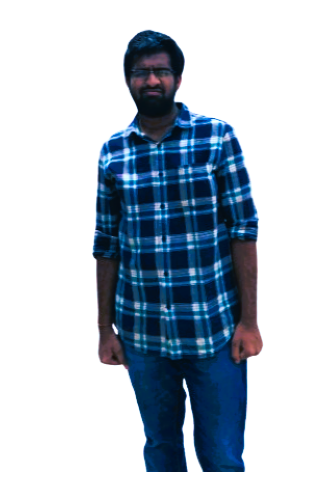

Caption: a man with a beard standing in front of a blue sky


In [17]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
from PIL import Image
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
import os

# Replace with your uploaded filename if different
IMG_PATH = "Janardhan.png"  # <-- change if needed

# Check file exists
if not os.path.exists(IMG_PATH):
    raise FileNotFoundError(f"{IMG_PATH} not found in current working directory. Did you upload it?")

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)

# Load pretrained model (small, ready-to-use checkpoint)
model_name = "nlpconnect/vit-gpt2-image-captioning"
model = VisionEncoderDecoderModel.from_pretrained(model_name).to(device)
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Generation settings
max_length = 64
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}

# load image
image = Image.open(IMG_PATH).convert("RGB")
plt.figure(figsize=(8,6))
plt.imshow(image)
plt.axis('off')
plt.show()

# preprocess and run
pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values.to(device)
with torch.no_grad():
    output_ids = model.generate(pixel_values, **gen_kwargs)

caption = tokenizer.decode(output_ids[0], skip_special_tokens=True).strip()
print("Caption:", caption)


In [18]:
from google.colab import drive
drive.mount('/content/drive')

# Example: update this path to your actual Drive path
IMG_PATH = "/content/drive/MyDrive/Camera Roll/WIN_20231005_12_17_53_Pro.jpg"

# then run the inference cell above (reuse the model & tokenizer variables or re-run that cell)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
